# Analysis Report on Employee Attrition

## Project Overview

This project aims to answer questions about employee attrition in a company and uncover the factors contributing to employee attrition using the Employee Attrition dataset. 

## What is Employee Attrition? 

Employee attrition occurs when the size of your workforce diminishes over time due to unavoidable factors such as employee resignation for personal or professional reasons. 

## Challenges Due to Employee Attrition: 

1. Loss of Talent and Knowledge
2. Costs of Recruitment and Training
3. Disruption in Workflow and Productivity
4. Impact on Team Morale and Culture
5. Customer Impact

## key Question Addressed: 

1. How does the distance from home affect attrition across different job roles?
2. What is the relationship between job satisfaction and attrition?
3. Is there a significant difference in average monthly income by education level and attrition status?
4. How does work-life balance affect employee attrition?

Using the OSEMN framework, this analysis will generate actionable insights to help reduce attrition and improve employee retention strategies.



### Obtain

Import necessary libraires and Load the Employee Attrition dataset into a pandas DataFrame. The DataSet is from Kaggle you can get the access to it here. 

In [673]:
# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

#Applying style sheet
%matplotlib inline
sns.set_style("white")
plt.style.use("fivethirtyeight")

# Load and Read Data 
data = pd.read_csv("HR-Employee-Attrition.csv")

#Make a copy of dataframe 
df = data.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Scrub
Clean the data to ensure it's ready for analysis. 

1. Remove duplicate entries.
2. Handle missing values.
3. Correct inconsistent data types.
4. Drop columns with no variance (e.g., columns where all values are the same).

#### Remove duplicates

In [674]:
#Check for any duplicates 
df_no_duplicates = df[df.duplicated()]
df_no_duplicates

# Dropping duplicates by removing duplicate rows based on all columns.
df = df.drop_duplicates()
df.duplicated().sum()

0

We have zero duplicates in this datasets and if we did they have been dropped.

#### Handle missing values

In [675]:
for column in df.columns: 
    print(f"{column}: {df[column].dtype}")

Age: int64
Attrition: object
BusinessTravel: object
DailyRate: int64
Department: object
DistanceFromHome: int64
Education: int64
EducationField: object
EmployeeCount: int64
EmployeeNumber: int64
EnvironmentSatisfaction: int64
Gender: object
HourlyRate: int64
JobInvolvement: int64
JobLevel: int64
JobRole: object
JobSatisfaction: int64
MaritalStatus: object
MonthlyIncome: int64
MonthlyRate: int64
NumCompaniesWorked: int64
Over18: object
OverTime: object
PercentSalaryHike: int64
PerformanceRating: int64
RelationshipSatisfaction: int64
StandardHours: int64
StockOptionLevel: int64
TotalWorkingYears: int64
TrainingTimesLastYear: int64
WorkLifeBalance: int64
YearsAtCompany: int64
YearsInCurrentRole: int64
YearsSinceLastPromotion: int64
YearsWithCurrManager: int64


In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Luckly no missing values. We have 35 columns(variables) and 1470 observations (rows) with 2 dtypes Int and object with 26 varaibles being int and 9 being object. 

In [677]:
#Check for missing values and handle the, 
missing_values = df.isnull().sum()

#Drop any row containing a missing value
df = df.dropna()

#Reducing the number of columns and rows being displayed using pd.set_option
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)


df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Drop columns with no variance

In [678]:
# Checking for wrong values by getting a descriptive analysis of datasets
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As we can from the data description, we do have some columns such as EmployeeCount, StandardHours with the standard deviation of 0.0 this means that all the values in thie Series are the same, and thus have no deviation from the mean. 

In [679]:
#Checking each column in our dataset for Unique Values's Number
for column in df.columns:
    uniques = df[column].nunique()
    print(f'{column} {uniques}')

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


We can see that we have one more column with one unique value (Over18). With the next code, we are going to remove it, along with the other 2 columns (EmployeeCount, StandardHours), in order to streamline the datasets for more effective analysis and modeling.

In [680]:
#Dropping columns with a single unique value or no variants
df = df.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis =1)

In [681]:
## Assigning our cleaned datasets columns to new varaible df_cc
df_c =  df.columns

Now let us assign columns with object data type to a variable called categorical_columns and columns with number to nummerical_columns

#### Categorical Columns

In [682]:
# Targeting Categorical Columns with ≤ 10 Unique Values
target_unique_value = 10
categorical_columns = []
for column in df:
    if df[column].dtype == object and len(df[column].unique()) <= target_unique_value :
        categorical_columns.append(column)

#If we print out the len() categorical_columns we get 8 
print(categorical_columns)

#Let us remove our dependent varaible 
categorical_columns.remove('Attrition')
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


#### Nummerical Columns

In [683]:
# Get Nummerical Columns
nummerical_columns = []
for column in df_c:
    if pd.api.types.is_numeric_dtype:
        nummerical_columns.append(column)

In [684]:
# Ensure consistent data types
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

### Dataset Overview:

1. 35 columns (variables)
2. 1470 observations (rows)
3. Data types: 26 integer columns and 9 object columns
4. No missing values after initial checks

## Explore

### Getting to Know the Data

Descriptive statistics gather basic information about the data to understand employee attribution better. It includes measures of central tendency, measures of dispersion, frequency tables, scatter plots, and correlation coefficients.

In [685]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


#### Measures of Central Tendency & Standard Deviations 

In [686]:
#Define a function to perform descriptive analysis 
def perform_descriptive_analysis (columns):
    middle_of_dataset = {}
    for column in columns:
        dtype = df[column].dtype
        if dtype == int and len(df[column]) > 30:
            middle_of_dataset[column] = {
                'mean': round(df[column].mean(), 2),
                'median': df[column].median(),
                'mode': df[column].mode()[0], 
                'max': df[column].max(),
                'min': df[column].min(),
                'std': df[column].std()
            }
    return middle_of_dataset
            
result = perform_descriptive_analysis(df_c)
measure_center_tendecy_std = pd.DataFrame.from_dict(result, orient='index')
measure_center_tendecy_std

,mean,median,mode,max,min,std
Age,36.92,36.0,35,60,18,9.135373
Attrition,0.16,0.0,0,1,0,0.367863
DailyRate,802.49,802.0,691,1499,102,403.509100
DistanceFromHome,9.19,7.0,2,29,1,8.106864
Education,2.91,3.0,3,5,1,1.024165
EmployeeNumber,1024.87,1020.5,1,2068,1,602.024335
EnvironmentSatisfaction,2.72,3.0,3,4,1,1.093082
HourlyRate,65.89,66.0,66,100,30,20.329428
JobInvolvement,2.73,3.0,3,4,1,0.711561
JobLevel,2.06,2.0,1,5,1,1.106940


Base on the result of measure center of tendency and standard devaition,we have now know the “middle” values for our of variables in our dataset and also get a sense of how much variance from the middle value we should expect from our data.This tells us how “spread out” our data is.

For example let us look at Age stastical summary 

Age: The age distribution shows a mean(36.92) and median(36.0) close to each other, indicating a relatively symmetric distribution around the mean. The standard deviation of 9.14 years suggests that most employees' ages lie within 9 years of the mean (roughly between 28 and 46 years). And employee's age range 18 - 60. 

DistanceFromHome: As the mean distance is 9.19 miles, a right-skewed distribution suggested by a median lower than the mean. The standard deviation shows a wide spread, indicating employees live at varying distances from the workplace.

Education: We can see most employees have a moderate level of education (around 3 on the scale), with the standard deviation showing some variation but generally centered around the mean.

Job Satisfaction: With the Mean: 2.73 and Median: 3.0, ranging from 1 to 4, and Standard Deviation: 1.10. I say that Job satisfaction is generally moderate, with also the standard deviation indicating some variability among employees' satisfaction levels.

Monthly Income: As we can also see in the monthly income that the mean: 6502.93 is higher than the median: 4919.0 indicating a right-skewed distribution with some high earners. With standard deviation reflecting difference in earning, meaning the montly income varies widely

Work-Life Balance: Work-life balance is moderate, with low variability indicating consistent perceptions among employees.




#### Frequency Table 

In [687]:
#Creating Frequency table for each categorical column
for column in categorical_columns:
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Frequency']
    freq_table['Percentage'] = round(((freq_table['Frequency'] / df.shape[0]) * 100), 2)
    print(f'Frequency Table for {column}:\n')
    print(freq_table)
    print('\n' + '✅'*30 + '\n')

Frequency Table for BusinessTravel:

      BusinessTravel  Frequency  Percentage
0      Travel_Rarely       1043       70.95
1  Travel_Frequently        277       18.84
2         Non-Travel        150       10.20

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅

Frequency Table for Department:

               Department  Frequency  Percentage
0  Research & Development        961       65.37
1                   Sales        446       30.34
2         Human Resources         63        4.29

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅

Frequency Table for EducationField:

     EducationField  Frequency  Percentage
0     Life Sciences        606       41.22
1           Medical        464       31.56
2         Marketing        159       10.82
3  Technical Degree        132        8.98
4             Other         82        5.58
5   Human Resources         27        1.84

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅

Frequency Table for Gender:

   Gender  Frequency  Percentage
0    Male        882        60.0
1  Female        588      

#### Understanding Data Samples

Understand and determine the best shape to describe the distribution of your data sample in relation to the current questions at hand


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

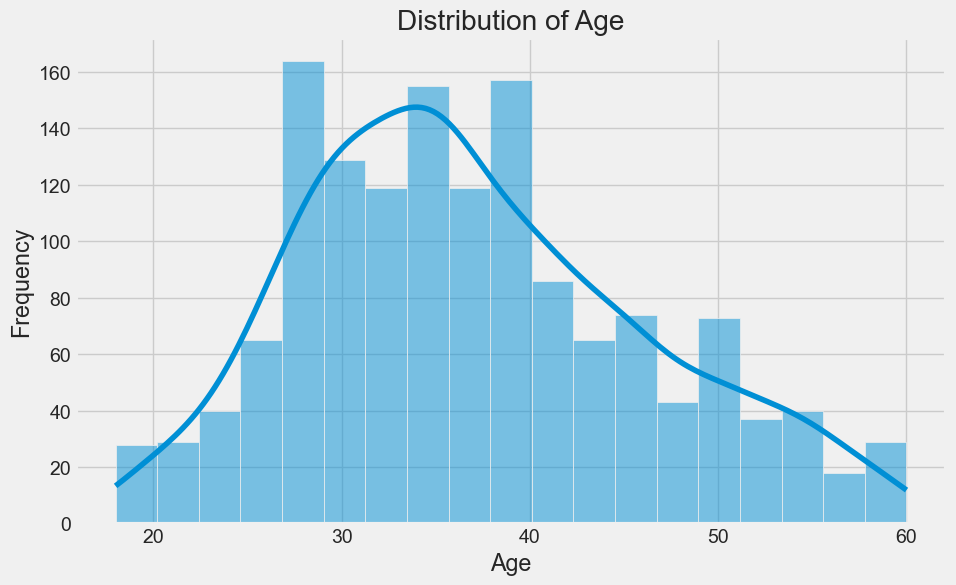

In [688]:
#TO GET AN IDEA OF THE AGE DISTRIBUTION
# Creating the HistPlot for Distribution of Age
plt.figure(figsize=(10, 6))
ax = sns.histplot(df, x="Age",kde = True)
plt.title('Distribution of Age')
plt.ylabel('Frequency')

We have normal distribution of the page since it appears to be bell shaped with a peal in the middle age ranges. The highest frequency of ages is centered around the 30-40 age range, indicating that most individuals fall within this age group. There are fewer people aged 20-25 and 55-60, indicating lower frequencies at the age extremes, these are outliers. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


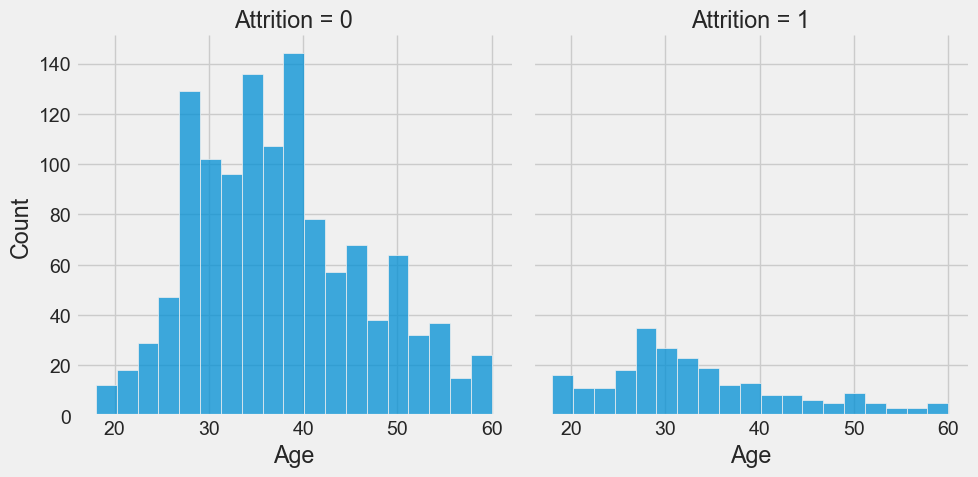

In [689]:
sns.displot(df, x="Age", col="Attrition")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


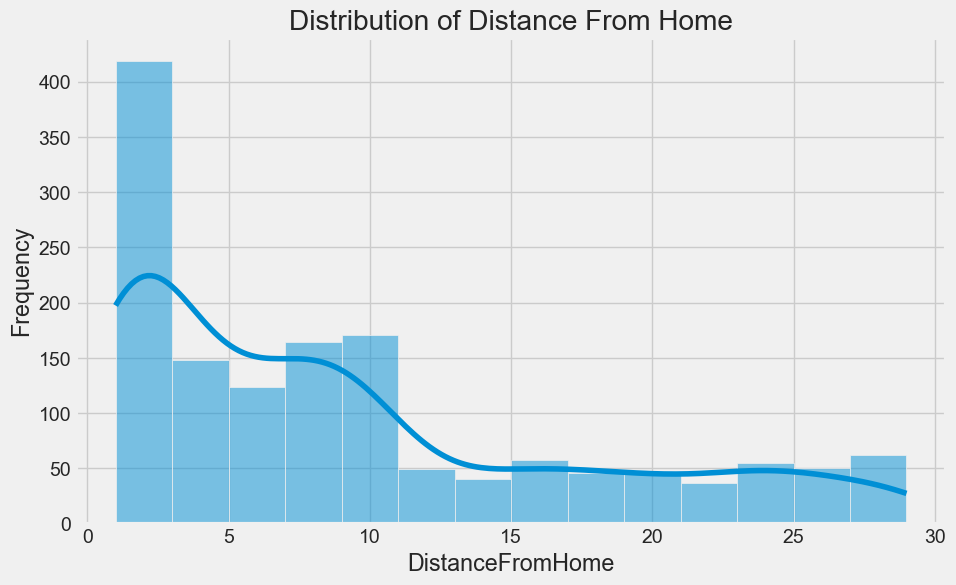

In [690]:
# Plot histogran of DistanceFromHome
plt.figure(figsize=(10, 6))
sns.histplot(df['DistanceFromHome'], kde=True)
plt.title('Distribution of Distance From Home')
plt.ylabel('Frequency')
plt.show()


The distribution of distance from home is right-skewed, indicating most individuals live very close to their workplace. We see the highest frequency is at the shortest distances (0-5 units), and the frequency decreases steadily as the distance increases. There is a slight increase around 10-15 units before continuing to decline. This pattern suggests a strong preference for shorter commutes.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


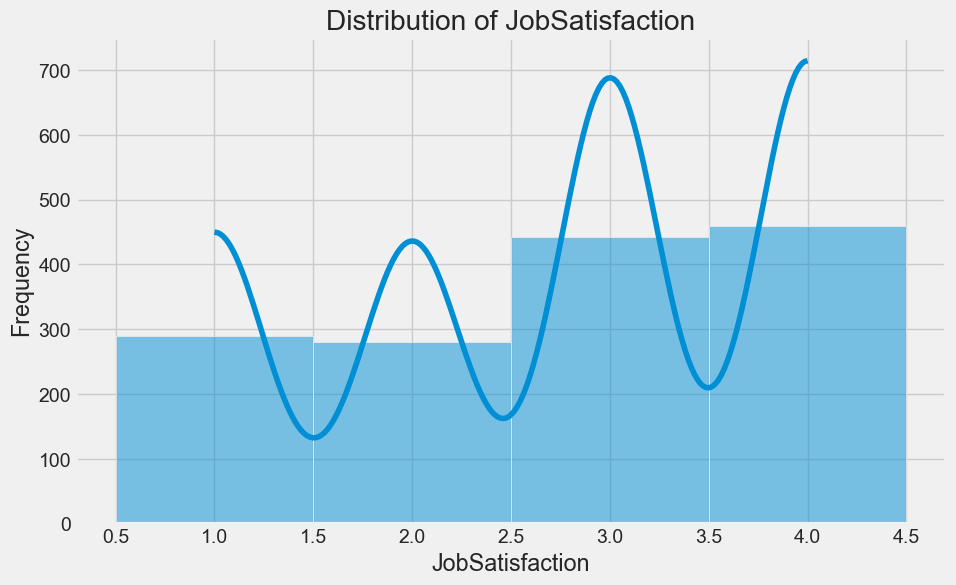

In [691]:
#Plot histogram of JobSatisfaction
plt.figure(figsize=(10, 6))
sns.histplot(df['JobSatisfaction'], kde=True, discrete=True)
plt.title('Distribution of JobSatisfaction')
plt.ylabel('Frequency')
plt.show()



The distribution of job satisfaction is bimodal, with two distinct peaks indicating that employees are generally either very satisfied or very dissatisfied with their jobs, with fewer individuals in the moderate satisfaction ranges.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


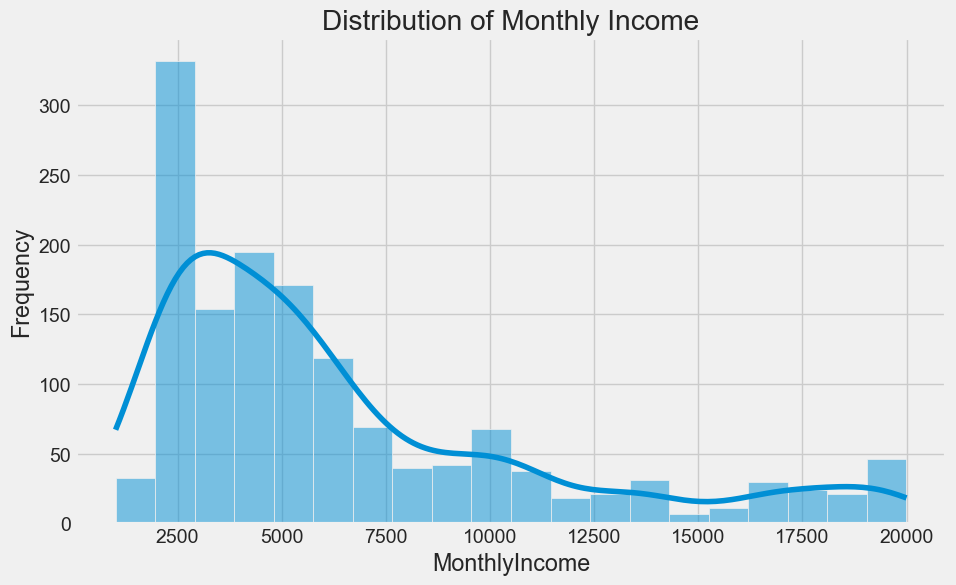

In [692]:
# Plot histogram of MonthlyIncome
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title('Distribution of Monthly Income')
plt.ylabel('Frequency')
plt.show()


We have a right-skewed distirbution for the monthly income stating that a large number of employees earning lower monethly incomes and fewer employeess earninh higher monthly incomes. The majority of them earn between $2,500 and $5,000 per month.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


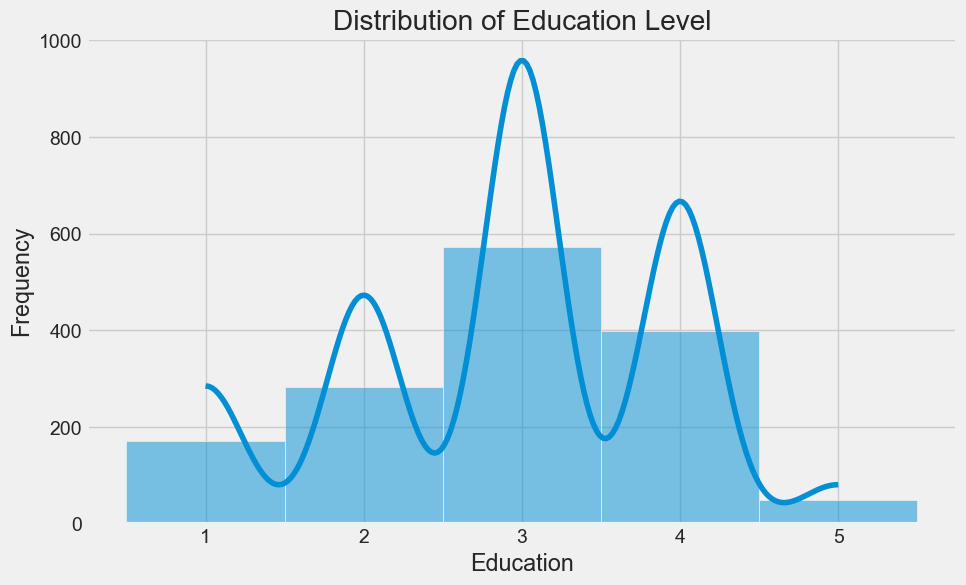

In [693]:
# Plot histogram of Education level
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Education'], discrete=True, kde=True)
plt.title('Distribution of Education Level')
plt.ylabel('Frequency')
plt.show()


In this Education Level Distribution, we can see here that we have mutlimodal, with the highest peak at level 3. There are smaller peaks at levels 2 and 4, and a low frequency at levels 1 and 5. This indicates that most individuals have a moderate level of education, with fewer at the very low or very high ends of the education spectrum. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


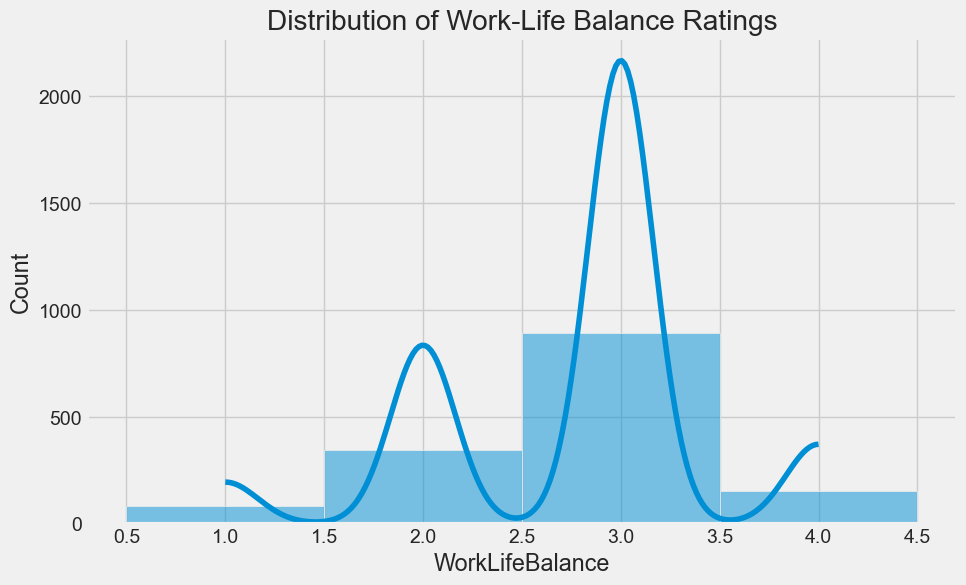

In [694]:
# Plot Histogramof work-life balance ratings
plt.figure(figsize=(10, 6))
sns.histplot(df, x='WorkLifeBalance', kde = True, discrete=True )
plt.title('Distribution of Work-Life Balance Ratings')
plt.ylabel('Count')
plt.show()

The majority of individuals have a moderate work-life balance rating, with fewer people rating their work-life balance as very low or very high and the distribution is multimodal, with a prominent peak around the rating of 3.0. There are smaller peaks at ratings around 1.5e and 4.0.

#### Correlation Analysis

/var/folders/gs/9pw0nsm11jq1w8_vbdt6fgpr0000gn/T/ipykernel_43102/2117493934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_matrix_df['JobRole'] = correlation_matrix_df['JobRole'].astype('category').cat.codes


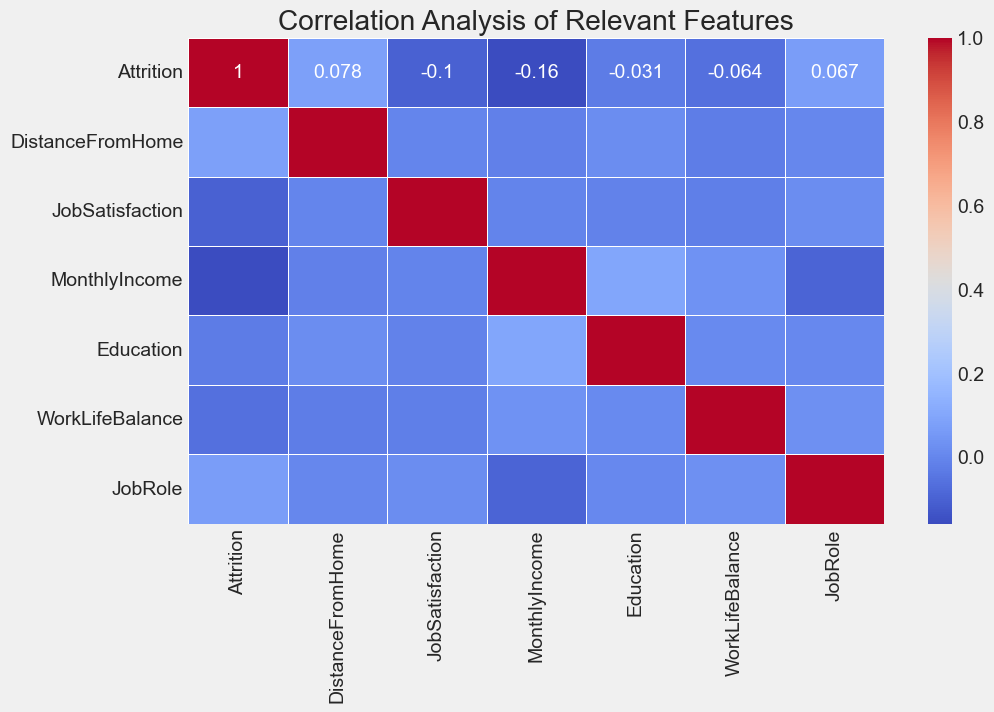

In [733]:
# Select relevant features for the analysis
correlation_columns= ['Attrition', 'DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome',
    'Education', 'WorkLifeBalance', 'JobRole']
correlation_matrix_df = df[correlation_columns]
correlation_matrix_df['JobRole'] = correlation_matrix_df['JobRole'].astype('category').cat.codes
# Calculate correlation matrix
correlation_matrix =correlation_matrix_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis of Relevant Features')
plt.show()

- Attrition vs. DistanceFromHome (0.078): Weak positive correlation; suggests employees farther from work are slightly more likely to leave.
- Attrition vs. JobSatisfaction (-0.10): Weak negative correlation; higher job satisfaction slightly linked to lower attrition.
- Attrition vs. MonthlyIncome (-0.16): Moderate negative correlation; higher income associated with lower attrition.
- Attrition vs. Education (-0.031): Very weak negative correlation; indicates almost no relationship.
- Attrition vs. WorkLifeBalance (-0.064): Weak negative correlation; better work-life balance slightly associated with lower attrition.
- Attrition vs. JobRole (0.067): Very weak positive correlation; suggests some roles might have slightly higher attrition rates.

#### Question 1: How does the distance from home differ between employees who left and those who stayed across different job roles?

In [731]:
# Group by JobRole and Attrition, then calculate the median DistanceFromHome
grouped_df_cleaned=df.groupby(['JobRole', 'Attrition'])["DistanceFromHome"].median().reset_index()
grouped_df_cleaned

,JobRole,Attrition,DistanceFromHome
0,Healthcare Representative,0,7.0
1,Healthcare Representative,1,20.0
2,Human Resources,0,3.5
3,Human Resources,1,15.0
4,Laboratory Technician,0,7.0
5,Laboratory Technician,1,7.0
6,Manager,0,4.0
7,Manager,1,2.0
8,Manufacturing Director,0,7.0
9,Manufacturing Director,1,7.5


In the table, we can observe the exact median for each job role. Similar to the visualization, the tables demonstrate that Healthcare Representative Employees who left (attrition = 1) have a significantly higher median distance from home (20.0) compared to those who stayed (attrition = 0) (7.0). This indicates that commute distance appears to be a significant factor influencing attrition for Healthcare Representatives. In addition, for Human Resources Employees who left, the median distance is 15.0 compared to 3.5 for those who stayed. Much like Healthcare Representatives, commute distance also seems to be a significant factor for Human Resources employees.

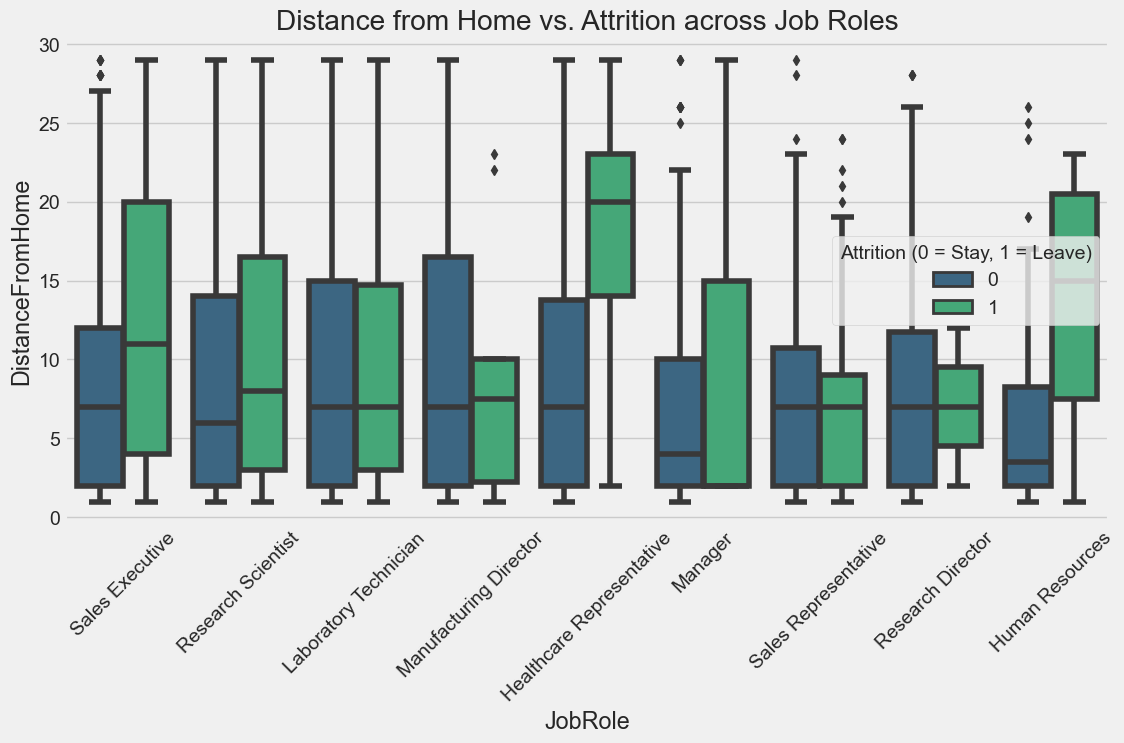

In [696]:
# Visualization of Distance from Home vs. Attrition across Job Role
plt.figure(figsize=(12, 6))
ax = sns.boxplot(df, x='JobRole', y='DistanceFromHome', hue='Attrition', palette='viridis')
plt.title('Distance from Home vs. Attrition across Job Roles')
plt.xlabel('JobRole')
plt.legend(title='Attrition (0 = Stay, 1 = Leave)')
plt.xticks(rotation=45)
plt.show()

We can see, this plot highlights that distance appears to be significant factors in roles like Sales Executive, Healthcare Representative, and Human Resources. 

Comparing the distribution of commute distances for employees who have left versus those who have stayed across various job roles. We can see those who are in Healthcare Representative, Human Resources and Sale Executive that left have higher median than those that stayed suggesting commute distance could be a factor. For Laboratory Technician and sales representative have similar distance indicate that there is no significant difference in commute distances between those who left and those who stayed. 

Let us formulate a hypothesis. A proposed answers to the question at hand—that we can then test using a statistical test. I will be using Mann-Whitney U test for this hypothesis. 

Hypthoses: There is a significant difference in the distance from home between employees who left and those who stayed across different job roles.

Noow let us test our hypothoesis using Mann-whitney U test

In [697]:
# Dictionary to hold the test results
mannwhitney_results = {}

# Perform the Mann-Whitney U test for each JobRole
for role in df['JobRole'].unique():
    group_yes = df[(df['JobRole'] == role) & (df['Attrition'] == 1)]['DistanceFromHome']
    group_no = df[(df['JobRole'] == role) & (df['Attrition'] == 0)]['DistanceFromHome']
    if len(group_yes) > 0 and len(group_no) > 0:
        u_stat, p_val = mannwhitneyu(group_yes, group_no)
        mannwhitney_results[role] = {'U-Statistic': u_stat, 'P-Value': p_val}

# Convert results to a DataFrame and print
results_df = pd.DataFrame(mannwhitney_results).T
results_df.reset_index(inplace=True)
results_df

,index,U-Statistic,P-Value
0,Sales Executive,9544.5,0.003588
1,Research Scientist,6138.0,0.471911
2,Laboratory Technician,6363.0,0.618346
3,Manufacturing Director,680.5,0.968721
4,Healthcare Representative,853.0,0.005560
5,Manager,246.5,0.956339
6,Sales Representative,738.5,0.421288
7,Research Director,76.5,0.975303
8,Human Resources,352.5,0.014285


We can for job roles such as  Sales Executive, Healthcare Representative, and Human Resources, there are significant differences in the distance from home between employees who left and those who stayed. This suggests that distance from home could be a factor influencing attrition in these specific job roles. For other job roles, the distance from home does not appear to significantly affect attrition.

In [698]:
df.groupby(['Attrition', 'JobRole'])["DistanceFromHome"].median()

Attrition  JobRole                  
0          Healthcare Representative     7.0
           Human Resources               3.5
           Laboratory Technician         7.0
           Manager                       4.0
           Manufacturing Director        7.0
           Research Director             7.0
           Research Scientist            6.0
           Sales Executive               7.0
           Sales Representative          7.0
1          Healthcare Representative    20.0
           Human Resources              15.0
           Laboratory Technician         7.0
           Manager                       2.0
           Manufacturing Director        7.5
           Research Director             7.0
           Research Scientist            8.0
           Sales Executive              11.0
           Sales Representative          7.0
Name: DistanceFromHome, dtype: float64

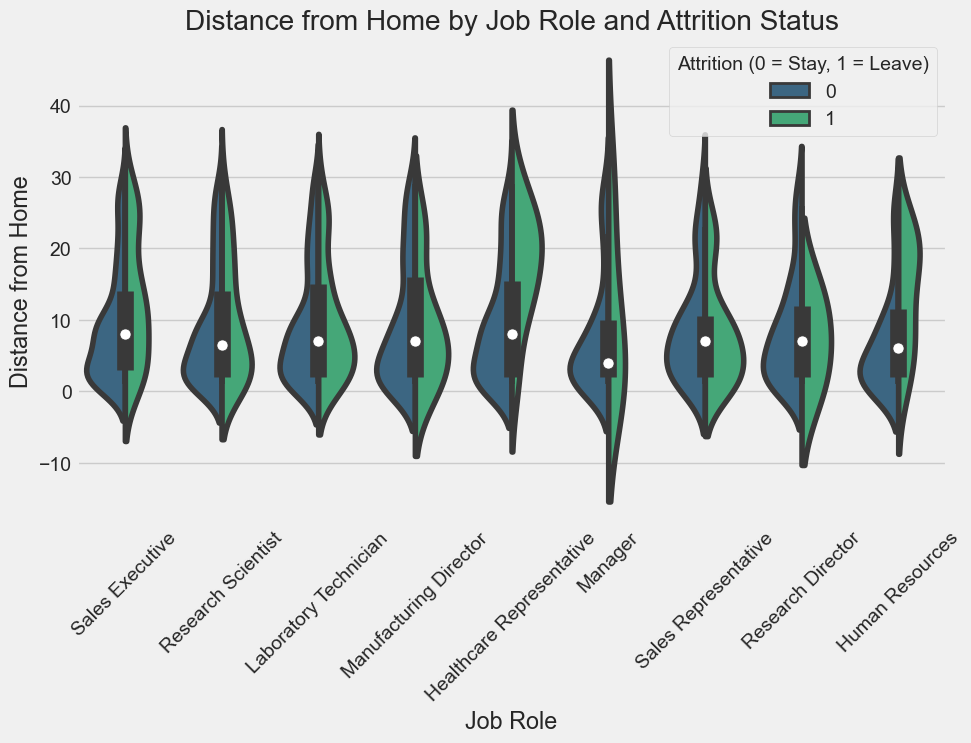

In [699]:
# Violin plot to visualize the relationship between job role, attrition, and distance from home
plt.figure(figsize=(10, 6))
sns.violinplot(df, x='JobRole', y='DistanceFromHome', hue='Attrition', split=True, palette='viridis')
plt.title('Distance from Home by Job Role and Attrition Status')
plt.xlabel('Job Role')
plt.ylabel('Distance from Home')
plt.xticks(rotation=45)
plt.legend(title='Attrition (0 = Stay, 1 = Leave)')
plt.show()

The violin plot effectively visualizes the distribution of distances from home for different job roles, separated by attrition status. The plot supports the findings from the Mann-Whitney U test by highlighting job roles with significant differences in distances from home, such as Sales Executive, Healthcare Representative, and Human Resources.

### Question 2: What is the relationship between job satisfaction and attrition?

In [700]:
# Group by 'Attrition' and calculate the median 'JobSatisfaction
df.groupby('Attrition')['JobSatisfaction'].median()

Attrition
0    3.0
1    3.0
Name: JobSatisfaction, dtype: float64

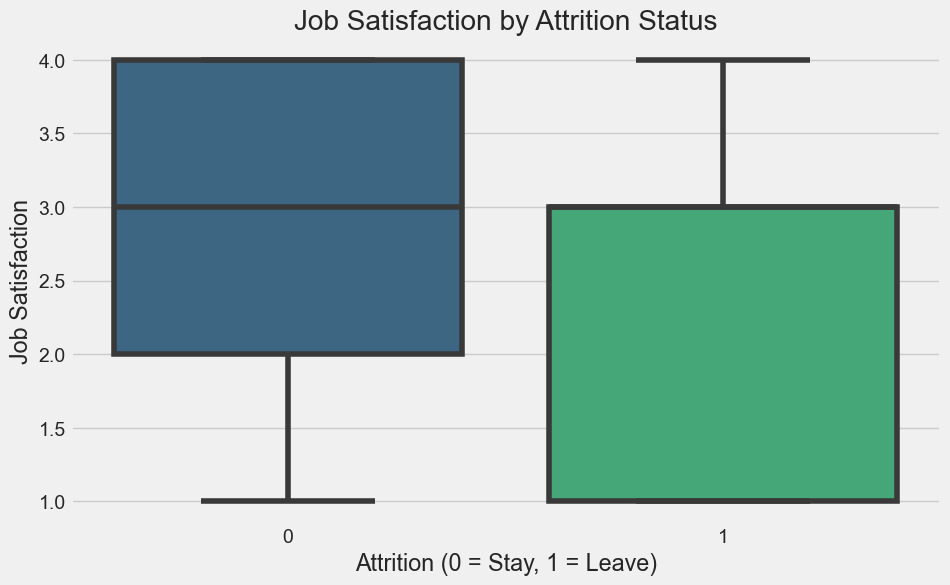

In [701]:
#Visualization of Job Satisfaction by Attrition Status
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='viridis')
plt.title('Job Satisfaction by Attrition Status')
plt.xlabel('Attrition (0 = Stay, 1 = Leave)')
plt.ylabel('Job Satisfaction')
plt.show()

We can see that employees who remained in the company have higher job satisfaction rate. As well the median score for those who stayed is higher as well. The higher median job satisfaction score among employees who stayed suggests that higher job satisfaction is associated with lower attrition rates. 



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

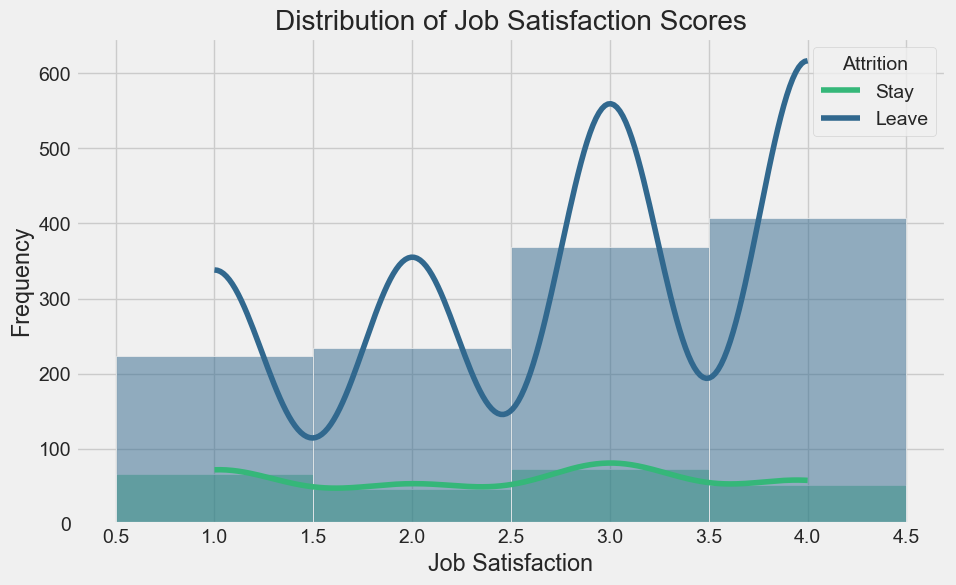

In [702]:
#  Plot Distribution of Job Satisfaction Scores by Attrition
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
ax = sns.histplot(df, x='JobSatisfaction', hue='Attrition', kde=True, palette='viridis', discrete=True)
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.legend(title='Attrition', labels=['Stay', 'Leave'])
plt.show()

As you can see from tjhe figure above, the employees who left(leave) tend to have a higher frequency at the ends and those who stayed(stay) have lower frequenncies across all job satisfaction scores compared to those who left.

The blue line KDE shows sharp increases at the lowest and highest job satisfaction ratings, suggesting that employees with very low or very high job satisfaction are more likely to leave. In contrast, the green line follows a more consistent path, indicating a more even distribution of job satisfaction ratings among those who remained.

 This indicates a significant contrast in the job satisfaction rating distribution between employees who stay and those who leave. Now we could say higher job satisfaction with lower employee attrition, as the data reveals that employees with extreme job satisfaction ratings (both low and high) are more inclined to leave the company.

Hypthoses:  There is a difference in the distribution of job satisfaction scores between employees who stayed and those who left.

Now let us conduct a Mann-Whitney U test to test our hypothoesis 

In [703]:
#Mann-Whitney U Test 
# Let us seperate the job satisfaction scores into two groups
stay_group = df[df['Attrition'] == 0]['JobSatisfaction']
leave_group = df[df['Attrition'] == 1]['JobSatisfaction']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(stay_group, leave_group, alternative='two-sided')

#Print result
print(f'stat : {stat}, p=value : {p_value}')

stat : 168858.5, p=value : 7.957917840891011e-05


We can see the p-value is 0.0000796 smaller than the alpha the significance level of 0.05. There is a statistically significant difference in the distribution of job satisfaction scores between employees who stayed and those who left the organization.

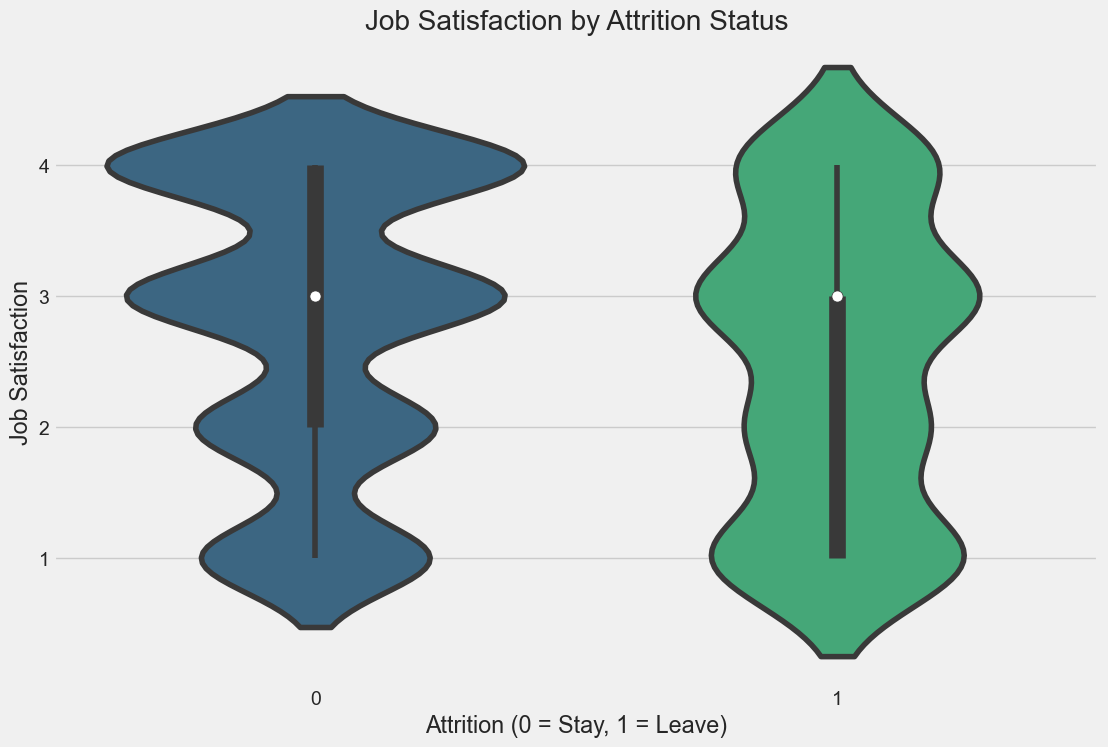

In [704]:
# Violin Plot of Job Satisfaction Density by Attrition Status
plt.figure(figsize=(12, 8))
ax = sns.violinplot(df, x='Attrition', y='JobSatisfaction', palette='viridis')
plt.title('Job Satisfaction by Attrition Status')
plt.xlabel('Attrition (0 = Stay, 1 = Leave)')
plt.ylabel('Job Satisfaction')
plt.show()

The distribution of job satisfaction scores for employees who stayed shows a wide range, with lots of scores at both the lower and higher ends. On the other hand, for employees who left, the scores are more concentrated in the middle range of job satisfaction.


The statistical test and visualizations support the hypothesis that there is a significant relationship between job satisfaction and attrition. Employees with lower job satisfaction are more likely to leave the organization.



### Question 3: Is there a significant difference in average monthly income by education level and attrition status?

In [705]:
df.groupby(['Attrition', 'Education'])["MonthlyIncome"].median()

Attrition  Education
0          1            3977.0
           2            4998.5
           3            5210.0
           4            5463.5
           5            6272.0
1          1            3041.0
           2            2923.5
           3            2863.0
           4            4445.0
           5            6134.0
Name: MonthlyIncome, dtype: float64

People with higher levels of education tend to have higher median monthly incomes. Those who stayed at their jobs usually earn more than those who left, suggesting a possible link between higher income and lower attrition rates. A noticeable difference can be seen in mid-level education, where those who left have significantly lower median incomes. The plot blow gives us a graphic representation of this. 

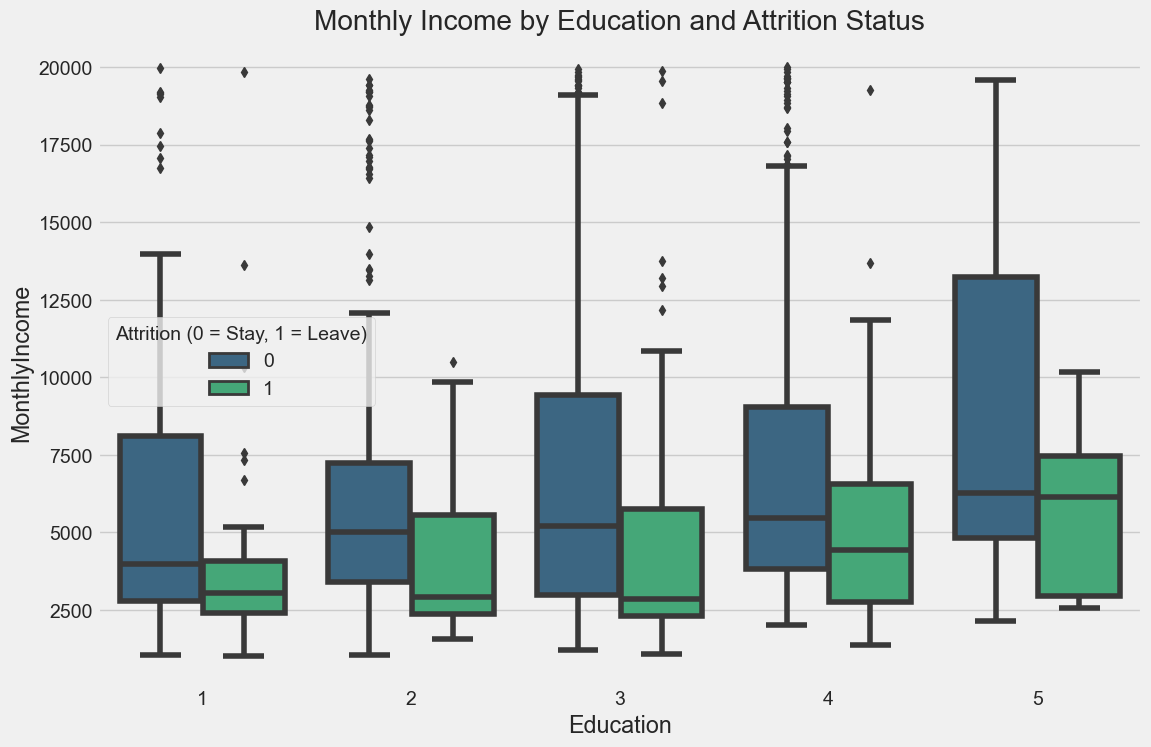

In [706]:
# Attrition by Monthly Income and Education Level
plt.figure(figsize=(12, 8))
sns.boxplot(df, x='Education', y='MonthlyIncome', hue='Attrition', palette='viridis')
plt.title('Monthly Income by Education and Attrition Status')
plt.legend(title='Attrition (0 = Stay, 1 = Leave)')


In [707]:
df.groupby(['Attrition', 'Education' ])['MonthlyIncome'].median()

Attrition  Education
0          1            3977.0
           2            4998.5
           3            5210.0
           4            5463.5
           5            6272.0
1          1            3041.0
           2            2923.5
           3            2863.0
           4            4445.0
           5            6134.0
Name: MonthlyIncome, dtype: float64

Employees who remained generally exhibit a higher median monthly income compared to those who departed (green boxes) across most education levels. There is a tendency for a wider range of monthly income for employees who stayed, suggesting greater variability in their incomes. On the other hand, a narrower range for employees who left implies less variability in their monthly incomes. Particularly at higher education levels, there are several outliers, indicating that some employees earn significantly more than the majority.

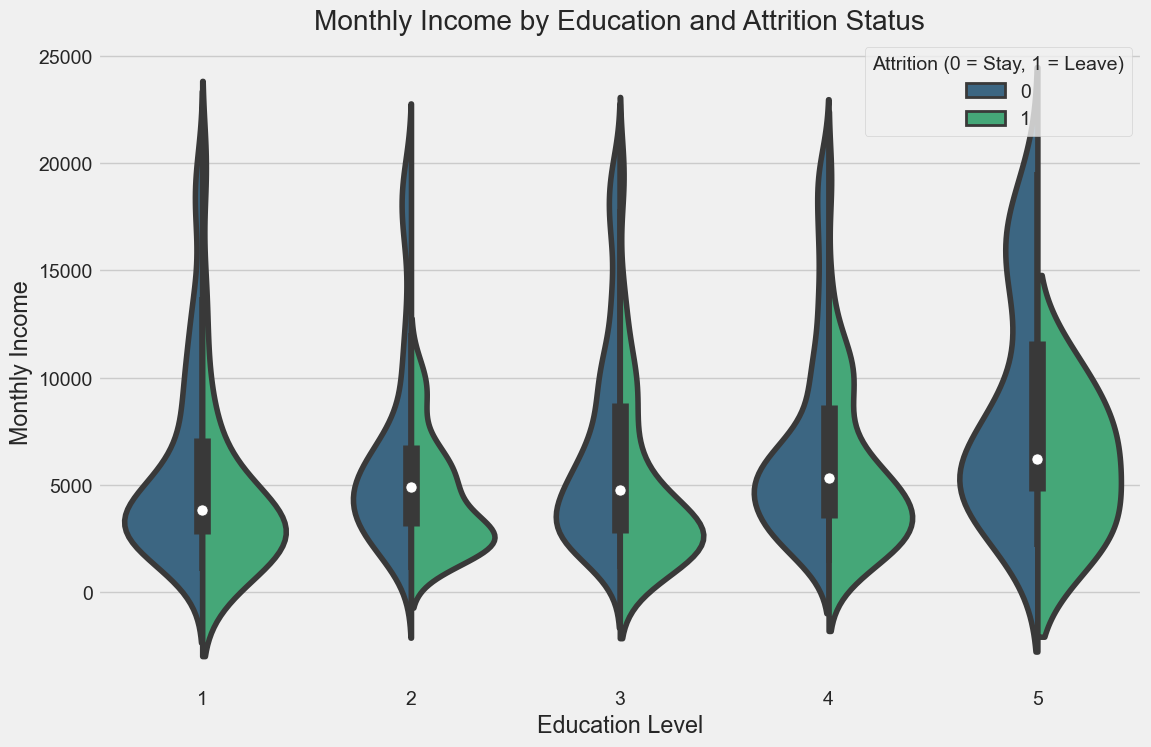

In [708]:
# Violin Plot of Monthly Income by Education and Attrition Status
plt.figure(figsize=(12, 8))
ax = sns.violinplot(df, x='Education', y='MonthlyIncome', hue='Attrition', split=True, palette='viridis')
plt.title('Monthly Income by Education and Attrition Status')
plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition (0 = Stay, 1 = Leave)')
plt.show()

The distribution of monthly income is more concentrated at lower income levels for employees who left, indicating that this group has a higher concentration of employees with lower incomes. On the other hand, employees who stayed show a wider range and higher concentration of incomes at higher levels, especially among those with higher education levels.

Hypothesis: There is a significant difference in average monthly income by education level and attrition status.

I have decided not to use the Mann-Whitney U test for this hypothesis because I want to investigate whether there is an interaction effect between education level and attrition status on monthly income.

In [709]:
#Convert the Eduction column to category 
df['Education'] = df['Education'].astype('category')

In [710]:
# Perform Two-Way ANOVA to examine the interaction effect between Education level and Attrition status on Monthly Income
# Define the formula
formula = 'MonthlyIncome ~ C(Education) * C(Attrition)'

model = ols(formula, df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table 


,sum_sq,df,F,PR(>F)
C(Education),3.057492e+08,4.0,3.553182,6.820416e-03
C(Attrition),7.951675e+08,1.0,36.963300,1.533986e-09
C(Education):C(Attrition),1.452162e+07,4.0,0.168759,9.543346e-01
Residual,3.140803e+10,1460.0,NaN,NaN


My analysis reveals that education level consistently impacts monthly income, regardless of attrition status. This is evidenced by the lack of a significant interaction between the two variables. Both education level and attrition status independently influence monthly income, as indicated by their respective p-levels of 0.00682 and 1.533986e-09, which are lower than our alpha value. 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x1070b3880> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


<Figure size 1200x800 with 0 Axes>

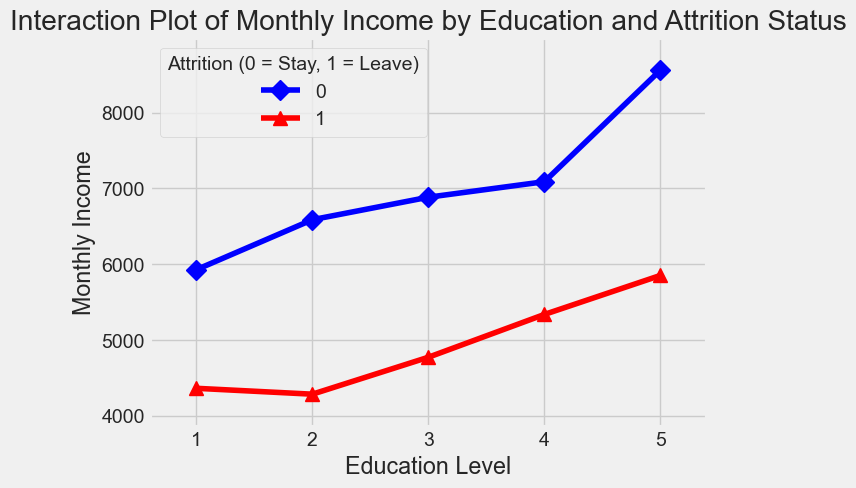

In [711]:
# Interaction Plot
plt.figure(figsize=(12, 8))
fig = interaction_plot(df['Education'], df['Attrition'], df['MonthlyIncome'],
                 colors=['blue', 'red'], markers=['D', '^'], ms=10)
plt.title('Interaction Plot of Monthly Income by Education and Attrition Status')
plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition (0 = Stay, 1 = Leave)')
plt.show()

Both the group that stayed and the group that left show an increase in monthly income as education levels rise. This is apparent from the upward trend of the lines. At each education level, employees who stayed (blue diamonds) have a higher average monthly income compared to those who left (red triangles). This suggests that attrition has a significant impact on monthly income. The lines for employees who stayed and those who left are not parallel, but the interaction effect was determined to be insignificant in the ANOVA table. Although the slopes differ, the p-value indicates that this difference is not statistically significant.

### Question 4:  How does work-life balance affect employee attrition?

In [712]:
#Frequencies of attrition across different levels of work-life balance
cross_tab_freq = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], margins=True)
print(cross_tab_freq)

Attrition           0    1   All
WorkLifeBalance                 
1                  55   25    80
2                 286   58   344
3                 766  127   893
4                 126   27   153
All              1233  237  1470


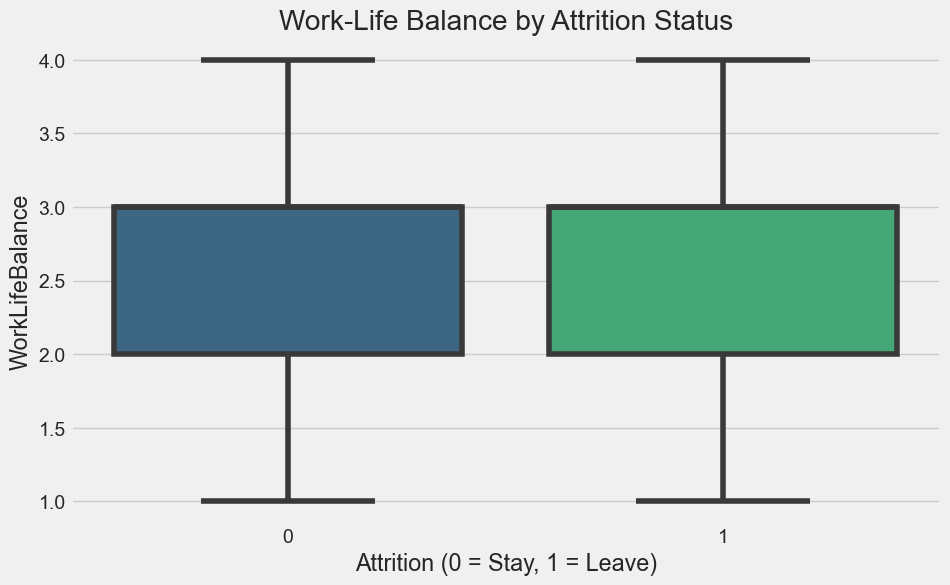

In [713]:
#Visualization of Work Life Balance by Attrition Status
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='Attrition', y='WorkLifeBalance', palette='viridis')
plt.title('Work-Life Balance by Attrition Status')
plt.xlabel('Attrition (0 = Stay, 1 = Leave)')
plt.show()


The median work-life balance scores are about the same for both groups, around 3, with the middle 50% of the data also showing similar results for both groups, ranging from approximately 2 to 3. There are no significant outliers in the data.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


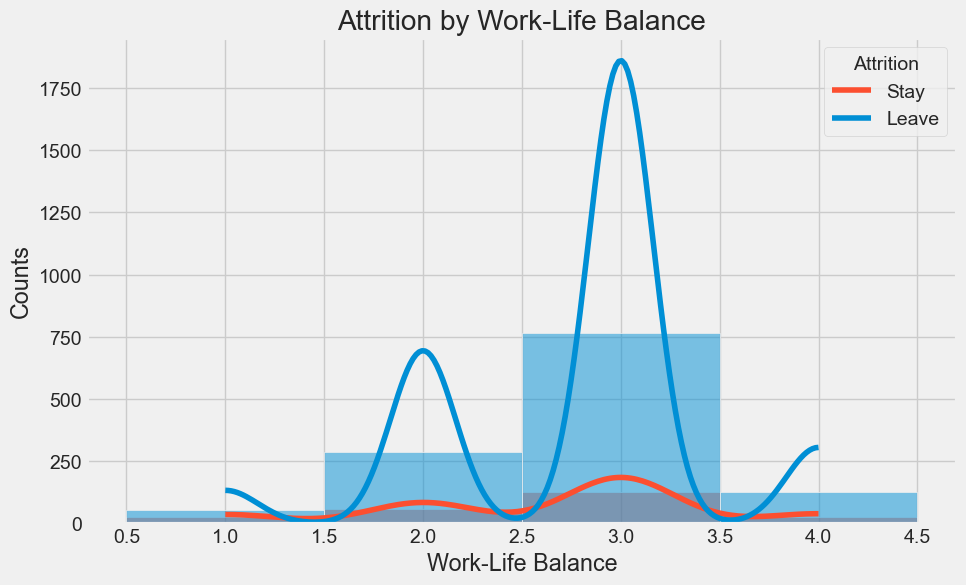

In [714]:
#  Plotting the relationship between work-life balance and attrition using bar plot
plt.figure(figsize=(10, 6))
sns.histplot(df, x='WorkLifeBalance', discrete=True, hue='Attrition', kde=True)
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Counts')
plt.legend(title='Attrition', labels=['Stay', 'Leave'])
plt.show()

The work-life balance rating of 3 applies to most employees. The majority of employees with a work-life balance rating of 3 have chosen to remain with the company, as indicated by the blue KDE curve. Employees who have lower work-life balance ratings (1 or 2) exhibit higher rates of attrition than those with higher ratings (3 or 4).

Here as well, we can see that employees who stayed have consistently higher retention rates across all work-life balance levels compared to those who left. Additionally, employees with moderate work-life balance (level 3) exhibit higher retention rates.


- Hypothesis: Work-life balance affects whether an employee stays with or leaves the company. Meaning there is a siginificant relationship between work-life balance and employee attrition. 

We can test this Hypothesis using Chi-Square test

In [715]:
# Chi-square test
chi2, p, dof, ex = chi2_contingency(cross_tab_freq)
print(f"Chi-square test for Work-Life Balance: chi2 = {chi2}, p_value = {p}")

Chi-square test for Work-Life Balance: chi2 = 16.325097091647404, p_value = 0.037956412776488965


 There is a statistically significant relationship between work-life balance and employee attrition (p-value < 0.05).

In [716]:
# Prepare the data for logistic regression
X = df['WorkLifeBalance']
y = df['Attrition']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Build the logistic regression model
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.439689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                0.004541
Time:                        18:11:30   Log-Likelihood:                -646.34
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.01517
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9974      0.272     -3.667      0.000      -1.530      -0.464
WorkLifeBalanc

The negative coefficient (-0.2396) indicates that as work-life balance improves (i.e., the rating increases), the likelihood of attrition decreases. The pseudo R-squared value of 0.004541 is relatively low, indicating that work-life balance alone explains a small portion of the variance in attrition. However, it still provides significant insight into the relationship.

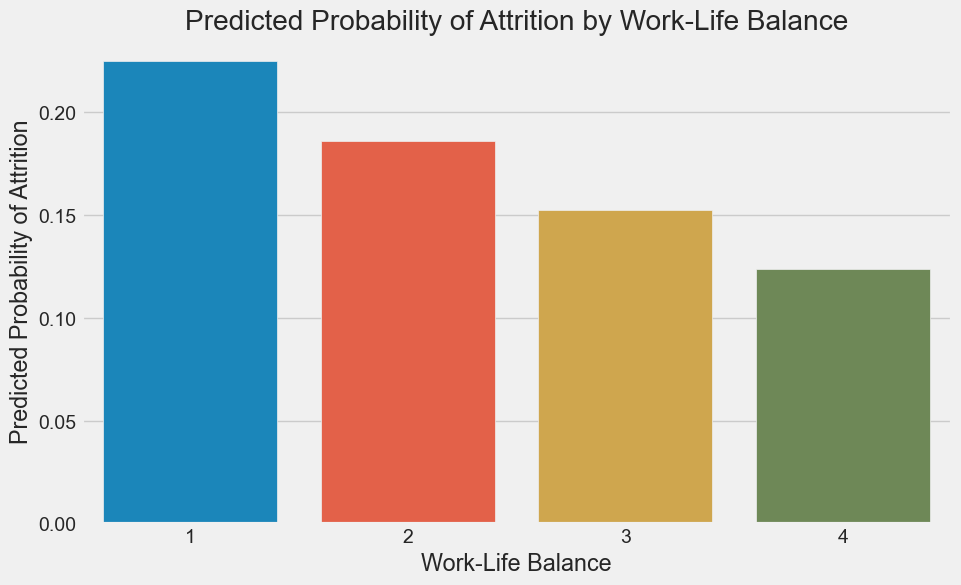

In [735]:
# Predict probabilities
df['Attrition_Prob'] = log_reg.predict(X)

# Visualize the predicted probabilities
plt.figure(figsize=(10, 6))
sns.barplot(df, x='WorkLifeBalance', y='Attrition_Prob')
plt.title('Predicted Probability of Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Predicted Probability of Attrition')
plt.show()

The work-life balance rating significantly impacts the likelihood of attrition among employees. Those with the lowest rating (1) have the highest predicted probability of leaving the company, around 20%. Employees with the highest rating (4) have the lowest probability of attrition, around 10%. Ratings 2 and 3 fall in between, indicating a correlation between work-life balance and attrition rates. 

The chart visually reinforces the findings from the logistic regression analysis and other statistical tests:

1. Higher work-life balance scores are associated with lower attrition rates.
2. Employees with lower work-life balance ratings are more likely to leave the company.

### iNterpret 

#### Conclusion and Recommendations

##### Conclusion: 

My analysis of employee attrition has revealed several key insights based on these factos:

1. Distance from Home and Attrition:

Distance from home significantly impacts attrition in specific job roles, particularly among Healthcare Representatives, Human Resources, and Sales Executives. Employees in these roles who live further from the workplace are more likely to leave.

 2. Job Satisfaction and Attrition:

There is a significant relationship between job satisfaction and attrition. Employees with lower job satisfaction are more likely to leave. The Mann-Whitney U test confirms that job satisfaction scores are significantly different between those who stay and those who leave.

 3. Monthly Income, Education Level, and Attrition:

Education level and attrition status independently impact monthly income, but their interaction is not significant. Employees with higher education levels generally earn more, and those who remain in the company tend to have higher monthly incomes across all education levels.

4. Work-Life Balance and Attrition:

Work-life balance significantly affects employee attrition. Employees with lower work-life balance ratings are more likely to leave. The logistic regression analysis confirms that improved work-life balance reduces the likelihood of attrition.


##### Recommendations: 

1. Addressing Commute Issues:

For roles where distance from home significantly affects attrition (e.g., Healthcare Representatives, Human Resources, Sales Executives), consider implementing flexible work arrangements, such as remote work options or flexible hours, to reduce the impact of long commutes.
Evaluate the possibility of providing transportation benefits or subsidies for employees with longer commutes.

2. Enhancing Job Satisfaction:

Conduct regular surveys to gauge job satisfaction and identify areas for improvement.
Implement targeted initiatives to improve job satisfaction, such as professional development opportunities, recognition programs, and creating a supportive work environment.
Foster open communication between management and employees to address concerns promptly.

3. Compensation and Career Development:

Ensure competitive compensation packages that reflect employees' education levels and market standards to retain talent.
Develop clear career progression paths and provide opportunities for skill development and advancement within the company.
Regularly review and adjust compensation policies to ensure fairness and competitiveness.

4. Promoting Work-Life Balance:

Implement policies that promote a healthy work-life balance, such as flexible working hours, remote work options, and ensuring reasonable workloads.
Encourage a culture that values and supports employees' well-being, offering resources like wellness programs, mental health support, and work-life balance training.
Regularly monitor and assess work-life balance and make necessary adjustments to policies and practices.

By addressing these areas, the company can effectively reduce employee attrition, retain valuable talent, and improve overall employee satisfaction and productivity.








